<a href="https://colab.research.google.com/github/alexandra-florea/JOBarcelona22DS/blob/main/MothPredictionModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Libraries and Data

In [ ]:
#data handling
import pandas as pd
import numpy as np

#preprocessing
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

#split and metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, classification_report, confusion_matrix

#algos
import xgboost as xgb
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

#plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
pd.options.display.float_format = '{:.4f}'.format
plt.style.use('seaborn')

#formatting 
from IPython.display import display
pd.options.display.float_format = '{:,.4f}'.format

In [ ]:
df = pd.read_csv('file:///Users/alexandraflorea/Downloads/train_pre.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7001 entries, 0 to 7000
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   time               7001 non-null   float64
 1   Sensor_alpha       7001 non-null   float64
 2   Sensor_beta        7001 non-null   float64
 3   Sensor_gamma       7001 non-null   float64
 4   Sensor_alpha_plus  7001 non-null   float64
 5   Sensor_beta_plus   7001 non-null   float64
 6   Sensor_gamma_plus  7001 non-null   float64
 7   Insect             7001 non-null   int64  
 8   Species            7001 non-null   object 
 9   s_Diptera          7001 non-null   int64  
 10  s_Hymenoptera      7001 non-null   int64  
 11  s_Lepidoptera      7001 non-null   int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 656.5+ KB


### Set X and y

In [ ]:
df["target"] = df["Insect"]

In [ ]:
useful_features = [c for c in df.columns if c not in ("Species", "s_Diptera", "s_Hymenoptera", "s_Lepidoptera", "Insect", "target")]

In [ ]:
useful_features

['time',
 'Sensor_alpha',
 'Sensor_beta',
 'Sensor_gamma',
 'Sensor_alpha_plus',
 'Sensor_beta_plus',
 'Sensor_gamma_plus']

In [ ]:
more_useful_features = [c for c in df.columns if c not in ("Species", "s_Diptera", "s_Hymenoptera", "s_Lepidoptera", "Insect", "target",'Sensor_alpha', 'Sensor_beta_plus',
 'Sensor_gamma_plus')]

In [ ]:
more_useful_features

['time', 'Sensor_beta', 'Sensor_gamma', 'Sensor_alpha_plus']

In [ ]:
X = df[useful_features] # all sensors + time
y = df["target"]

In [ ]:
X_red = df[more_useful_features] # a reduced version of X containing just 3 of the 6 sensors, as per Feature importance

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=13)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(4900, 7) (4900,)
(2101, 7) (2101,)


### Lazy models

In [ ]:
pip install lazypredict

  Using cached joblib-1.0.0-py3-none-any.whl (302 kB)
  Using cached numpy-1.19.1-cp38-cp38-macosx_10_9_x86_64.whl (15.3 MB)
  Using cached lightgbm-2.3.1-py2.py3-none-macosx_10_9_x86_64.macosx_10_10_x86_64.macosx_10_11_x86_64.macosx_10_12_x86_64.macosx_10_13_x86_64.macosx_10_14_x86_64.macosx_10_15_x86_64.whl (679 kB)
  Using cached scikit_learn-0.23.1-cp38-cp38-macosx_10_9_x86_64.whl (7.2 MB)
  Using cached xgboost-1.1.1-py3-none-macosx_10_13_x86_64.macosx_10_14_x86_64.macosx_10_15_x86_64.whl (1.1 MB)
  Using cached scipy-1.5.4-cp38-cp38-macosx_10_9_x86_64.whl (29.0 MB)
  Using cached pandas-1.0.5-cp38-cp38-macosx_10_9_x86_64.whl (10.2 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Attempting uninstall: scipy
    Found existing installation: scipy 1.8.0
    Uninstalling scipy-1.8.0:
      Successfully uninstalled scipy-1.8.0
  Attempting uninstall: joblib
    Found existing in

In [ ]:
import lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

#### Using all sensors as predictors

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|███████████████████████████████████████████| 29/29 [00:06<00:00,  4.17it/s]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.9043,0.8329,None,0.9016,0.1972
XGBClassifier,0.8991,0.8276,None,0.8964,0.3934
RandomForestClassifier,0.8886,0.7951,None,0.8837,0.6756
ExtraTreesClassifier,0.8843,0.7940,None,0.8797,0.3823
BaggingClassifier,0.8748,0.7867,None,0.8708,0.1952
DecisionTreeClassifier,0.8287,0.7777,None,0.8298,0.0420
AdaBoostClassifier,0.8320,0.7188,None,0.8250,0.2731
SVC,0.8072,0.6984,None,0.7993,0.4345
LabelSpreading,0.7634,0.6960,None,0.7616,1.1382


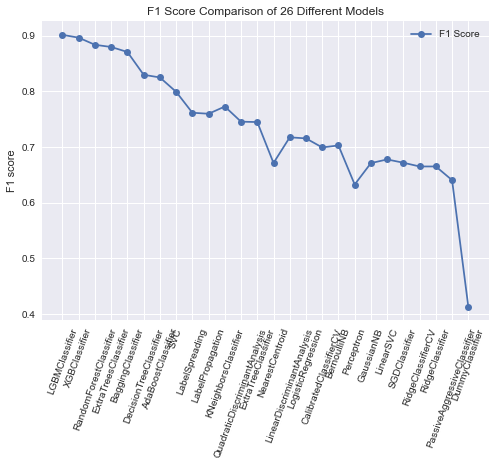

In [ ]:
plt.plot(models.index, models["F1 Score"],label = "F1 Score" ,marker='o')
plt.ylabel("F1 score")
plt.title("F1 Score Comparison of 26 Different Models")
plt.legend()
plt.xticks(rotation=70)
plt.show()

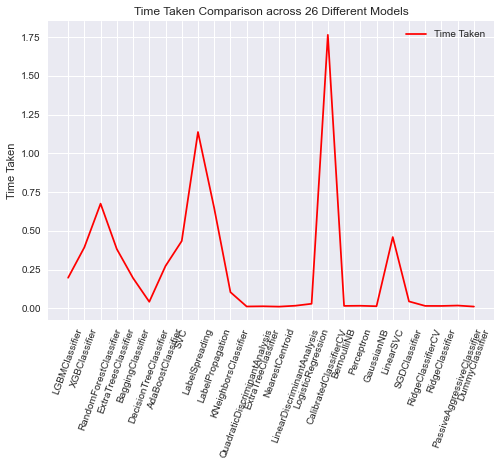

In [ ]:
plt.plot(models.index, models["Time Taken"],label = "Time Taken" ,marker='x', color='r')
plt.ylabel("Time Taken")
plt.title("Time Taken Comparison across 26 Different Models")
plt.legend()
plt.xticks(rotation=70)
plt.show()

In [ ]:
models.head(8)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.9043,0.8329,None,0.9016,0.1972
XGBClassifier,0.8991,0.8276,None,0.8964,0.3934
RandomForestClassifier,0.8886,0.7951,None,0.8837,0.6756
ExtraTreesClassifier,0.8843,0.7940,None,0.8797,0.3823
BaggingClassifier,0.8748,0.7867,None,0.8708,0.1952
DecisionTreeClassifier,0.8287,0.7777,None,0.8298,0.0420
AdaBoostClassifier,0.8320,0.7188,None,0.8250,0.2731
SVC,0.8072,0.6984,None,0.7993,0.4345


#### Using 3 sensors as predictors

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size=0.3, stratify=y, random_state=13)

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|███████████████████████████████████████████| 29/29 [00:06<00:00,  4.81it/s]


In [ ]:
models.head(8)

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.9091,0.8400,None,0.9066,0.1553
XGBClassifier,0.9039,0.8344,None,0.9014,0.2929
ExtraTreesClassifier,0.9029,0.8262,None,0.8997,0.3074
RandomForestClassifier,0.8943,0.8164,None,0.8910,0.6656
BaggingClassifier,0.8862,0.8070,None,0.8831,0.1215
KNeighborsClassifier,0.8786,0.8067,None,0.8755,0.0621
LabelPropagation,0.8691,0.7956,None,0.8656,0.6159
LabelSpreading,0.8691,0.7955,None,0.8656,1.0079


### AutoML

In [ ]:
pip install mljar-supervised

     |████████████████████████████████| 17.6 MB 7.4 MB/s eta 0:00:01
  Using cached lightgbm-3.3.2-py3-none-macosx_10_14_x86_64.macosx_10_15_x86_64.macosx_11_0_x86_64.whl (1.2 MB)
     |████████████████████████████████| 55.3 MB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 8.5 MB 8.0 MB/s eta 0:00:01
     |████████████████████████████████| 11.0 MB 5.9 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 5.7 MB/s eta 0:00:01
     |████████████████████████████████| 16.0 MB 5.9 MB/s eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.1
    Uninstalling numpy-1.19.1:
      Successfully uninstalled numpy-1.19.1
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.4
    Uninstalling scipy-1.5.4:
      Successfully uninstalled scipy-1.5.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
  

In [ ]:
from supervised import AutoML

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=13)

In [ ]:
automl = AutoML(mode="Compete", 
                #results_path="file:///Users/alexandraflorea/Downloads/automl_compete/",
                model_time_limit=30*60,
                start_random_models=10,
                algorithms=['LightGBM', 'Xgboost', 'Extra Trees'],
                train_ensemble=True,
                ml_task="multiclass_classification",
                eval_metric='f1',
                explain_level=2)

In [ ]:
automl.fit(X_train,y_train)

AutoML directory: AutoML_1
The task is multiclass_classification with evaluation metric f1
AutoML will use algorithms: ['LightGBM', 'Xgboost', 'Extra Trees']
AutoML will stack models
AutoML will ensemble available models
AutoML steps: ['adjust_validation', 'simple_algorithms', 'default_algorithms', 'not_so_random', 'golden_features', 'kmeans_features', 'insert_random_feature', 'features_selection', 'hill_climbing_1', 'hill_climbing_2', 'boost_on_errors', 'ensemble', 'stack', 'ensemble_stacked']
* Step adjust_validation will try to check up to 1 model
1_DecisionTree f1 0.836735 trained in 12.84 seconds
Adjust validation. Remove: 1_DecisionTree
Validation strategy: 5-fold CV Shuffle,Stratify
Skip simple_algorithms because no parameters were generated.
* Step default_algorithms will try to check up to 3 models
1_Default_LightGBM f1 0.896122 trained in 32.04 seconds


`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different beh

2_Default_Xgboost f1 0.899796 trained in 29.37 seconds
3_Default_ExtraTrees f1 0.750408 trained in 25.63 seconds
* Step not_so_random will try to check up to 27 models
13_LightGBM f1 0.897755 trained in 27.66 seconds


`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different beh

4_Xgboost f1 0.897551 trained in 32.97 seconds
22_ExtraTrees f1 0.734694 trained in 25.38 seconds
14_LightGBM f1 0.89 trained in 45.0 seconds


`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different beh

5_Xgboost f1 0.89898 trained in 39.81 seconds
23_ExtraTrees f1 0.805306 trained in 32.52 seconds
15_LightGBM f1 0.897347 trained in 40.45 seconds


`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different beh

6_Xgboost f1 0.884694 trained in 44.44 seconds
24_ExtraTrees f1 0.736122 trained in 33.08 seconds
16_LightGBM f1 0.893061 trained in 63.66 seconds


`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different beh

7_Xgboost f1 0.872449 trained in 48.64 seconds
25_ExtraTrees f1 0.788367 trained in 49.59 seconds
17_LightGBM f1 0.891429 trained in 57.49 seconds


`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different beh

8_Xgboost f1 0.877755 trained in 59.02 seconds
26_ExtraTrees f1 0.729592 trained in 112.86 seconds
18_LightGBM f1 0.884286 trained in 149.47 seconds


`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different beh

9_Xgboost f1 0.883061 trained in 66.5 seconds
27_ExtraTrees f1 0.826735 trained in 64.24 seconds
19_LightGBM f1 0.896122 trained in 90.63 seconds


`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different beh

10_Xgboost f1 0.896531 trained in 168.57 seconds
28_ExtraTrees f1 0.783469 trained in 95.48 seconds
20_LightGBM f1 0.898163 trained in 194.34 seconds


`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different beh

11_Xgboost f1 0.88449 trained in 246.16 seconds
29_ExtraTrees f1 0.754286 trained in 227.26 seconds
21_LightGBM f1 0.896531 trained in 218.59 seconds


`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different beh

12_Xgboost f1 0.891837 trained in 263.87 seconds
30_ExtraTrees f1 0.782449 trained in 300.51 seconds
Skip golden_features because of the time limit.
Skip kmeans_features because of the time limit.
Skip insert_random_feature because of the time limit.
Skip features_selection because no parameters were generated.
Skip hill_climbing_1 because of the time limit.
Skip hill_climbing_2 because of the time limit.
* Step boost_on_errors will try to check up to 1 model


`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different beh

2_Default_Xgboost_BoostOnErrors f1 0.898367 trained in 279.67 seconds
* Step ensemble will try to check up to 1 model
Ensemble f1 0.899796 trained in 2.73 seconds
* Step stack will try to check up to 29 models


`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different beh

2_Default_Xgboost_Stacked f1 0.897755 trained in 491.31 seconds
20_LightGBM_Stacked f1 0.902041 trained in 423.61 seconds
27_ExtraTrees_Stacked f1 0.899592 trained in 473.72 seconds


`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different beh

5_Xgboost_Stacked f1 0.897551 trained in 557.58 seconds
13_LightGBM_Stacked f1 0.900612 trained in 527.73 seconds
23_ExtraTrees_Stacked f1 0.900612 trained in 526.49 seconds


`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different beh

4_Xgboost_Stacked f1 0.898571 trained in 672.82 seconds
15_LightGBM_Stacked f1 0.901224 trained in 542.0 seconds
25_ExtraTrees_Stacked f1 0.901429 trained in 514.21 seconds


`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different beh

10_Xgboost_Stacked f1 0.901429 trained in 578.45 seconds
21_LightGBM_Stacked f1 0.900816 trained in 520.04 seconds
28_ExtraTrees_Stacked f1 0.902653 trained in 685.38 seconds


`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different beh

12_Xgboost_Stacked f1 0.898776 trained in 645.56 seconds
1_Default_LightGBM_Stacked f1 0.901224 trained in 732.85 seconds
30_ExtraTrees_Stacked f1 0.901224 trained in 857.57 seconds


`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different beh

6_Xgboost_Stacked f1 0.902857 trained in 889.07 seconds
19_LightGBM_Stacked f1 0.901837 trained in 669.89 seconds
29_ExtraTrees_Stacked f1 0.900612 trained in 717.88 seconds


`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different beh

11_Xgboost_Stacked f1 0.902449 trained in 893.77 seconds
16_LightGBM_Stacked f1 0.90102 trained in 890.48 seconds
3_Default_ExtraTrees_Stacked f1 0.90102 trained in 767.16 seconds


`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different beh

9_Xgboost_Stacked f1 0.902245 trained in 787.13 seconds
17_LightGBM_Stacked f1 0.902449 trained in 860.17 seconds
24_ExtraTrees_Stacked f1 0.899388 trained in 894.96 seconds


`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
`feval` is deprecated, use `custom_metric` instead.  They have different beh

8_Xgboost_Stacked f1 0.902245 trained in 906.58 seconds
14_LightGBM_Stacked f1 0.902245 trained in 926.42 seconds
22_ExtraTrees_Stacked f1 0.901224 trained in 1038.04 seconds
18_LightGBM_Stacked f1 0.902245 trained in 988.24 seconds
26_ExtraTrees_Stacked f1 0.900816 trained in 994.96 seconds
* Step ensemble_stacked will try to check up to 1 model
Ensemble_Stacked f1 0.903061 trained in 8.89 seconds
AutoML fit time: 24284.72 seconds
AutoML best model: Ensemble_Stacked


AutoML(algorithms=['LightGBM', 'Xgboost', 'Extra Trees'], eval_metric='f1',
       explain_level=2, ml_task='multiclass_classification', mode='Compete',
       model_time_limit=1800, start_random_models=10)

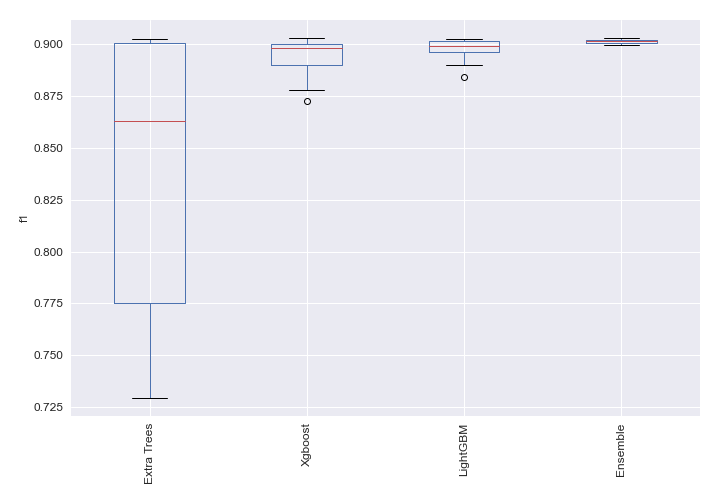

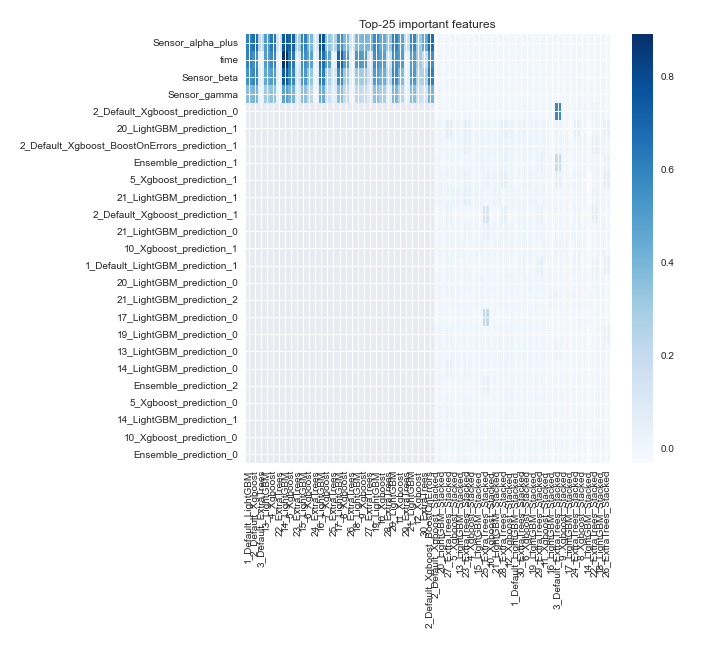

In [ ]:
y_pred=automl.predict(X_test)

In [ ]:
f1_score(y_pred,y_test,average='macro')

0.8483835257881696

### Other algos

#### Catboost

In [ ]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
# add a pipe here with scaling

cat = CatBoostClassifier(iterations=900,
                         learning_rate=0.03,
                         border_count=None,
                         verbose=False,
                         custom_metric='F1')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size=0.3, stratify=y, random_state=13)
cat.fit(X_train, y_train, verbose=False, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [ ]:
y_pred = cat.predict(X_test)

In [ ]:
f1_score(y_pred, y_test, average='macro')

0.865040111566089

In [ ]:
f1_score(y_pred, y_test, average='micro')

0.9105188005711568

In [ ]:
import shap

Error in sys.excepthook:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 1979, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'RuntimeError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 1981, in showtraceback
    stb = self.InteractiveTB.structured_traceback(etype,
  File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/ultratb.py", line 1105, in structured_traceback
    return FormattedTB.structured_traceback(
  File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/ultratb.py", line 999, in structured_traceback
    return VerboseTB.structured_traceback(
  File "/opt/anaconda3/lib/python3.8/site-packages/IPython/core/ultratb.py", line 851, in structured_traceback
    assert etb 

In [ ]:
# compute SHAP values
explainer = shap.TreeExplainer(cat)
shap_values = explainer.shap_values(X_test)

C extension was not built during install!


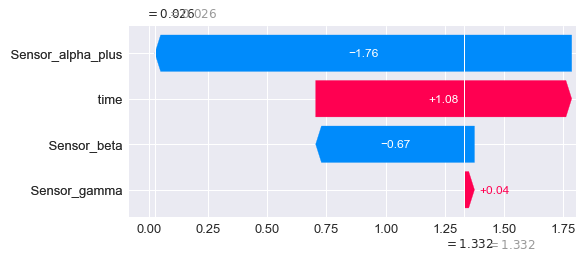

In [ ]:
row = 512

shap.waterfall_plot(shap.Explanation(values=shap_values[0][row], 
                                              base_values=explainer.expected_value[0], 
                                              data=X_test.iloc[row],  
                                              feature_names=X_test.columns.tolist()))

In [ ]:
y_test[512]

0

In [ ]:
!pip install eli5 

     |████████████████████████████████| 216 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 133 kB 5.0 MB/s eta 0:00:01
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=c0dc99eb01c5f33e3504ef21dfd07e57f7495695928a20d1e1f28e4881c70eeb
  Stored in directory: /Users/alexandraflorea/Library/Caches/pip/wheels/85/ac/25/ffcd87ef8f9b1eec324fdf339359be71f22612459d8c75d89c
Successfully built eli5
  Attempting uninstall: MarkupSafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.10.2 requires ruamel-yaml, which is not

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

imp = PermutationImportance(cat, random_state=13).fit(X_test, y_test)
eli5.show_weights(imp, feature_names = X_test.columns.tolist())

Weight,Feature
0.2287 ± 0.0141,Sensor_alpha_plus
0.1985 ± 0.0151,Sensor_beta
0.1957 ± 0.0105,time
0.1700 ± 0.0166,Sensor_gamma


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=13)
cat.fit(X_train, y_train, verbose=False, plot=False)

imp = PermutationImportance(cat, random_state=13).fit(X_test, y_test)
eli5.show_weights(imp, feature_names = X_test.columns.tolist())

Weight,Feature
0.2036 ± 0.0098,Sensor_alpha_plus
0.2007 ± 0.0089,time
0.1609 ± 0.0061,Sensor_beta
0.1336 ± 0.0103,Sensor_gamma
-0.0019 ± 0.0016,Sensor_alpha
-0.0022 ± 0.0026,Sensor_gamma_plus
-0.0024 ± 0.0020,Sensor_beta_plus


#### Grid search on Catboost with CV

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X_red, y, 
                                                    test_size=0.3, 
                                                    stratify=y, random_state=13)

pipe_cat = Pipeline([('scale', StandardScaler()),
                     ('cat', CatBoostClassifier(random_state=13))])

grid_params_cat = [{'depth' : [5,7,10], 
                    'learning_rate' : [0.03,0.1], 
                    'iterations' : [100, 900,1300]}]

CAT = GridSearchCV(estimator=pipe_cat,
                   param_grid=grid_params_cat,
                   scoring='f1_macro',
                   cv=5,
                   n_jobs=-1)

#fit grid search
grid_result=CAT.fit(X_train, y_train)

#get best score
cv_score = CAT.best_score_

test_score = CAT.score(X_test, y_test)

print(f'F1 score: {cv_score}\n Test score: {test_score}')

print(classification_report(y_test, CAT.predict(X_test)))

In [ ]:
model = CatBoostClassifier()

grid = {'learning_rate': [0.03, 0.1],
        'depth': [5, 7, 10],
        'iterations' : [300,900,1300]}

grid_search_result = model.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1.0693146	test: 1.0684127	best: 1.0684127 (0)	total: 2.72ms	remaining: 814ms
1:	learn: 1.0401960	test: 1.0392195	best: 1.0392195 (1)	total: 5.42ms	remaining: 807ms
2:	learn: 1.0121753	test: 1.0112662	best: 1.0112662 (2)	total: 7.99ms	remaining: 791ms
3:	learn: 0.9847109	test: 0.9839078	best: 0.9839078 (3)	total: 11.7ms	remaining: 868ms
4:	learn: 0.9588095	test: 0.9578973	best: 0.9578973 (4)	total: 13.2ms	remaining: 780ms
5:	learn: 0.9368195	test: 0.9363438	best: 0.9363438 (5)	total: 14.8ms	remaining: 728ms
6:	learn: 0.9151958	test: 0.9146970	best: 0.9146970 (6)	total: 16.7ms	remaining: 700ms
7:	learn: 0.8943238	test: 0.8943492	best: 0.8943492 (7)	total: 18.8ms	remaining: 687ms
8:	learn: 0.8739870	test: 0.8739725	best: 0.8739725 (8)	total: 20.7ms	remaining: 668ms
9:	learn: 0.8575579	test: 0.8578425	best: 0.8578425 (9)	total: 23ms	remaining: 666ms
10:	learn: 0.8404814	test: 0.8411493	best: 0.8411493 (10)	total: 25.2ms	remaining: 662ms
11:	learn: 0.8256090	test: 0.8264188	best: 

#### Neural Networks

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# define pipeline steps
steps = [('scaler', StandardScaler()),
         ('nnClass', MLPClassifier(max_iter=1000))]

#train test split on the reduced data
X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size=0.3, stratify=y, random_state=13)

# initialize Pipeline
pipeline = Pipeline(steps)

# fit neural network scaled as per pipeline
nn_scaled = pipeline.fit(X_train, y_train)

# get predicted values
y_pred = nn_scaled.predict(X_test)

# print micro and macro F1 scores
print("F1 micro score of the baseline neural network algorithm is: {:,.5f}".format(f1_score(y_test, y_pred, average='micro')))
print("F1 macro score of the baseline neural network algorithm is: {:,.5f}".format(f1_score(y_test, y_pred, average='macro')))

F1 micro score of the baseline neural network algorithm is: 0.92194
F1 macro score of the baseline neural network algorithm is: 0.87963


#### Grid search on Neural Networks with CV

In [ ]:
# modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size=0.3, stratify=y, random_state=13)

# define pipeline steps
steps = [('scaler', StandardScaler()),
         ('nn', MLPClassifier())]

# define pipeline model
pipeline = Pipeline(steps)

# define parameters for grid search
parameters = {
    'nn__max_iter': [500,1000]}

# define GridSearch
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=parameters,
    scoring = 'f1_macro',
    n_jobs = -1,
    cv = 10,
    verbose=True
)

# train grid search
grid_search.fit(X_train, y_train)

# best estimator
grid_search.best_estimator_

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   30.3s finished


Pipeline(steps=[('scaler', StandardScaler()),
                ('nn', MLPClassifier(max_iter=1000))])

In [ ]:
y_pred = grid_search.predict(X_test)
f1_score(y_test, y_pred, average='macro')

0.8826673892621025

In [ ]:
f1_score(y_test, y_pred, average='micro')

0.9233698238933841

#### XGBoost with GridSearch with CV

In [ ]:
# modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size=0.3, stratify=y, random_state=13)

# define pipeline steps
steps = [('scaler', StandardScaler()),
         ('xgb', XGBClassifier(objective='multi:softmax',
                   num_class=3,
                   seed=13))]

# define pipeline model
pipeline = Pipeline(steps)

# define parameters for grid search
parameters = {
    'xgb__max_depth': range (2, 10, 1),
    'xgb__n_estimators': range(60, 220, 40),
    'xgb__learning_rate': [0.1, 0.01, 0.05]
}

# define GridSearch
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=parameters,
    scoring = 'f1_macro',
    n_jobs = -1,
    cv = 10,
    verbose=True
)

# train grid search
grid_search.fit(X_train, y_train)

# best estimator
grid_search.best_estimator_


Fitting 10 folds for each of 96 candidates, totalling 960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 438 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 788 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 960 out of 960 | elapsed:  2.6min finished


Pipeline(steps=[('scaler', StandardScaler()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=0, num_class=3, num_parallel_tree=1,
                               objective='multi:softprob', random_state=13,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
                               seed=13, subsample=1, tree_method='exact',
                               validate_parameters=1, verbosity=None))])

In [ ]:
y_pred = grid_search.predict(X_test)
f1_score(y_test, y_pred, average='macro')

0.8565783582310534

In [ ]:
f1_score(y_test, y_pred, average='micro')

0.9057591623036649

#### LGBM with CV

In [ ]:
# modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size=0.3, stratify=y, random_state=13)

# define pipeline steps
steps = [('scaler', StandardScaler()),
         ('lgbm', LGBMClassifier(objective='multi:softmax',
                   num_class=3,
                   seed=13))]

# define pipeline model
pipeline = Pipeline(steps)

# define parameters for grid search
parameters = {
    'lgbm__max_depth': range (2, 10, 1),
    'lgbm__n_estimators': range(60, 220, 40),
    'lgbm__learning_rate': [0.1, 0.01, 0.05],
    'lgbm__num_leaves':[10,100]
}

# define GridSearch
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=parameters,
    scoring = 'f1_macro',
    n_jobs = -1,
    cv = 10,
    verbose=True
)

# train grid search
grid_search.fit(X_train, y_train)

# best estimator
grid_search.best_estimator_



Fitting 10 folds for each of 192 candidates, totalling 1920 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 334 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 834 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 1328 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1920 out of 1920 | elapsed:  1.5min finished


Pipeline(steps=[('scaler', StandardScaler()),
                ('lgbm',
                 LGBMClassifier(max_depth=9, n_estimators=140, num_class=3,
                                num_leaves=10, objective='multi:softmax',
                                seed=13))])

In [ ]:
y_pred = grid_search.predict(X_test)
f1_score(y_test, y_pred, average='macro')

0.8570940493998708

In [ ]:
f1_score(y_test, y_pred, average='micro')

0.90861494526416

#### Final model

In [ ]:
# modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_red, y, test_size=0.3, stratify=y, random_state=13)

# define pipeline steps
steps = [('scaler', StandardScaler()),
         ('nn', MLPClassifier())]

# define pipeline model
pipeline = Pipeline(steps)

# define parameters for grid search
parameters = {
    'nn__max_iter': [500,1000]}

# define GridSearch
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=parameters,
    scoring = 'f1_macro',
    n_jobs = -1,
    cv = 10,
    verbose=True
)

# train grid search
grid_search.fit(X_train, y_train)

# best estimator
grid_search.best_estimator_

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   31.7s finished


Pipeline(steps=[('scaler', StandardScaler()),
                ('nn', MLPClassifier(max_iter=1000))])

In [ ]:
y_pred = grid_search.predict(X_test)
f1_score(y_test, y_pred, average='macro')

0.8807506707274957

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1056
           1       0.92      0.97      0.95       838
           2       0.89      0.67      0.76       207

    accuracy                           0.92      2101
   macro avg       0.91      0.86      0.88      2101
weighted avg       0.92      0.92      0.92      2101



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[984  59  13]
 [ 16 817   5]
 [ 56  12 139]]


In [ ]:
pip install pycm==3.5

     |████████████████████████████████| 66 kB 4.3 MB/s eta 0:00:011
     |████████████████████████████████| 590 kB 3.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pycm import *

In [ ]:
y_test = np.array(y_test)

<AxesSubplot:title={'center':'Confusion Matrix (Normalized)'}, xlabel='Predicted Classes', ylabel='Actual Classes'>

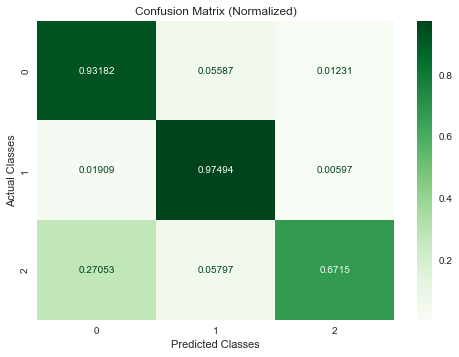

In [ ]:
cm = ConfusionMatrix(y_test, y_pred, is_imbalanced = True)
cm.plot(cmap=plt.cm.Greens,normalized=True,number_label=True,plot_lib="seaborn")

### Save final model prediction

In [ ]:
test = pd.read_csv('file:///Users/alexandraflorea/Downloads/test_x.csv')

In [ ]:
test.head()

,Unnamed: 0,Hour,Minutes,Sensor_alpha,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,Sensor_beta_plus,Sensor_gamma_plus
0,7000,21,31,-72.0836,-11.4350,-52.9617,-72.6964,145.2992,-143.8562
1,7001,21,3,-193.6200,40.1371,85.4192,-26.2668,-125.3912,80.9050
2,7002,22,31,42.5784,-51.6134,125.0556,182.1367,-9.7270,-114.9134
3,7003,21,25,-64.1510,287.3068,-70.9655,13.7897,38.1873,137.7617
4,7004,18,11,193.7508,-61.9895,-110.3471,-16.8648,148.5419,232.4246


In [ ]:
test.shape

(3000, 9)

In [ ]:
test.columns

Index(['Unnamed: 0', 'Hour', 'Minutes', 'Sensor_alpha', 'Sensor_beta',
       'Sensor_gamma', 'Sensor_alpha_plus', 'Sensor_beta_plus',
       'Sensor_gamma_plus'],
      dtype='object')

In [ ]:
keep = [c for c in test.columns if c in ('Unnamed: 0', 
                                         'Hour', 
                                         'Minutes', 
                                         'Sensor_beta',
                                         'Sensor_gamma',
                                         'Sensor_alpha_plus')]

In [ ]:
test = test[keep]

In [ ]:
test['time'] = (test['Hour']*60+test['Minutes'])/60

In [ ]:
test = test.drop(['Hour', 'Minutes'], axis = 1)

In [ ]:
test.head()

,Unnamed: 0,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,time
0,7000,-11.4350,-52.9617,-72.6964,21.5167
1,7001,40.1371,85.4192,-26.2668,21.0500
2,7002,-51.6134,125.0556,182.1367,22.5167
3,7003,287.3068,-70.9655,13.7897,21.4167
4,7004,-61.9895,-110.3471,-16.8648,18.1833


In [ ]:
test[test.columns[1:]]

,Sensor_beta,Sensor_gamma,Sensor_alpha_plus,time
0,-11.4350,-52.9617,-72.6964,21.5167
1,40.1371,85.4192,-26.2668,21.0500
2,-51.6134,125.0556,182.1367,22.5167
3,287.3068,-70.9655,13.7897,21.4167
4,-61.9895,-110.3471,-16.8648,18.1833
...,...,...,...,...
2995,87.3371,77.1935,-79.6940,3.4333
2996,-37.1072,120.3739,208.0906,21.1000
2997,34.7370,-195.0181,-164.2948,21.0000
2998,-73.1003,-117.3307,11.3538,20.2167


In [ ]:
pred = grid_search.predict(test[test.columns[1:]])

In [ ]:
pred

array([1, 2, 0, ..., 2, 1, 2])

In [ ]:
pred = pd.DataFrame(pred)

In [ ]:
test[test.columns[0]]

0       7000
1       7001
2       7002
3       7003
4       7004
        ... 
2995    9995
2996    9996
2997    9997
2998    9998
2999    9999
Name: Unnamed: 0, Length: 3000, dtype: int64

In [ ]:
results = pd.concat([test[test.columns[0]],pred], axis=1)

In [ ]:
results.rename(columns={'Unnamed: 0':'Index',
                        0: 'Insect'}, inplace=True)

In [ ]:
results.head()

,Index,Insect
0,7000,1
1,7001,2
2,7002,0
3,7003,2
4,7004,1


In [ ]:
results.to_csv('results.csv', index=False)